In [9]:
# DNN regressor

import numpy as np
import os
import tensorflow as tf
from datetime import datetime
tf.logging.set_verbosity(tf.logging.ERROR)

import matplotlib.pyplot as plt
import time
%matplotlib inline
st = time.time()

# data is assumed to be [V_vec I_vec C_vec]
# number of input_param is variable and is determined by the code


# change the file name if using a different system
data = np.loadtxt(os.path.expanduser('~/quantum-ml/data/var_K_I_V_1000_3_10meV.txt'))

# data randomly permuted to improve learning rate
K_vec = np.linspace(3e-3,10e-3,1000)
#data = np.concatenate((K_vec.reshape(len(K_vec),1),data),axis=1)
print(data.shape)
data = np.random.permutation(data)
n_tot = data.shape[0]
n_train = int(0.9*n_tot)
n_test = n_tot - n_train

# input parameters
n_inp = int((data.shape[1])/3)
n_out = int((data.shape[1])/3)
print("Number of inputs:", n_inp)
print("Number of outputs:", n_out)

x_train_data = data[:n_train,n_inp:2*n_inp].reshape((n_train,n_inp))
y_train_data = data[:n_train,2*n_inp:].reshape((n_train,n_out)).astype(int)
x_test_data = data[n_train:,n_inp:2*n_inp].reshape((n_test,n_inp))
y_test_data = data[n_train:,2*n_inp:].reshape((n_test,n_out)).astype(int)

print("Total, Training, Test")
print(n_tot, n_train, n_test)


#get data
def get_train_inputs():
    x = tf.constant(x_train_data)
    y = tf.constant(y_train_data)
    return x,y

def get_test_inputs():
    x = tf.constant(x_test_data)
    y = tf.constant(y_test_data)
    return x,y

# load datasets
features = [tf.contrib.layers.real_valued_column("",dimension=n_inp)]
regressor = tf.contrib.learn.DNNRegressor(feature_columns=features,label_dimension=n_out,hidden_units=[10])

# Magic happens here!

regressor.fit(input_fn=get_train_inputs, steps=50000)

accuracy_score = regressor.evaluate(input_fn=get_test_inputs,steps=1)
print(accuracy_score)

predictions = list(regressor.predict(input_fn=get_test_inputs))


print("Completed in",time.time()-st, "seconds.")


def eval_accur(y1,y2):
    diff = np.abs(y1-y2)
    return len(np.where(diff == 0)[0])*1.0/len(diff)
accur = [eval_accur(x,y) for (x,y) in zip(y_test_data[:],np.ceil(predictions))]
print("Accuracy : ",np.mean(accur))

(1000, 300)
Number of inputs: 100
Number of outputs: 100
Total, Training, Test
1000 900 100
{'loss': 0.98311651, 'global_step': 50000}
Completed in 387.6854016780853 seconds.
Accuracy :  0.2384


In [9]:
y_test_data.shape

(20, 100)

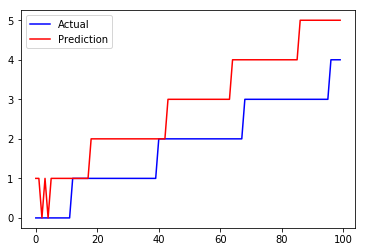

In [10]:
i = 4
plt.plot(y_test_data[i,:],'b')
plt.plot(np.ceil(predictions[i][:]),'r')
plt.legend(('Actual','Prediction'))

Accuracy :  0.463


In [124]:
diff = y_test_data[0,:]- np.ceil(predictions[0][:])
print(len(np.where(diff == 0)[0]))

57
